In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py
from scipy import io
def process(A):
    return np.sqrt(np.abs(A))


In [2]:
rs = np.load('COACS/pattern.npy')
vs = np.load('COACS/pattern2.npy')

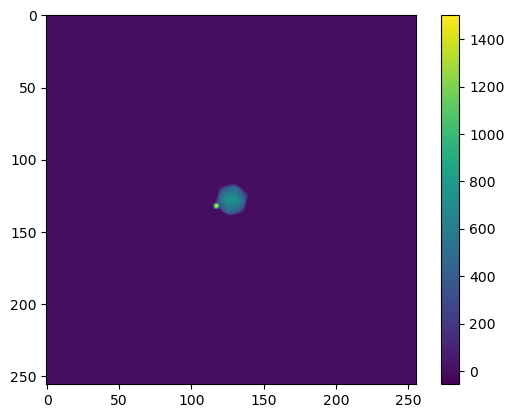

In [218]:
f = h5py.File('COACS/reference.mat', 'r')
ref = f['reference']
real = ref[:]['real']
imag = ref[:]['imag']
comp = real + imag
plt.imshow(real)
plt.colorbar()
plt.savefig("reference.png", bbox_inches="tight")
plt.show()


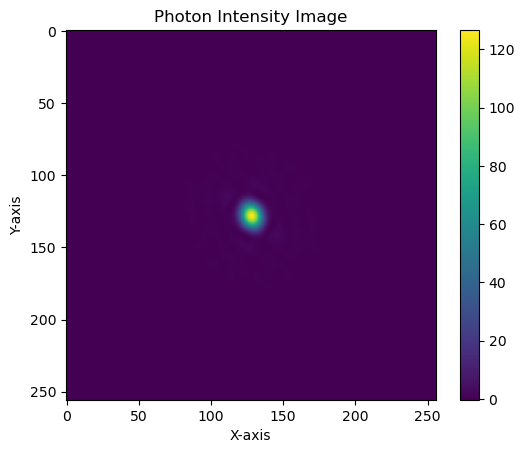

In [4]:
rim = np.fft.fftshift(rs[0])
vim = np.fft.fftshift(vs[0])
# CuPy
# 5 rounds, 1 rep, test sample
plt.imshow(rim)
plt.imshow(vim)
plt.colorbar()  # Optional: Add a colorbar to show intensity scale
plt.title("Photon Intensity Image")  # Optional: Add a title
plt.xlabel("X-axis")  # Optional: Add label for X-axis
plt.ylabel("Y-axis")  # Optional: Add label for Y-axis
plt.show()

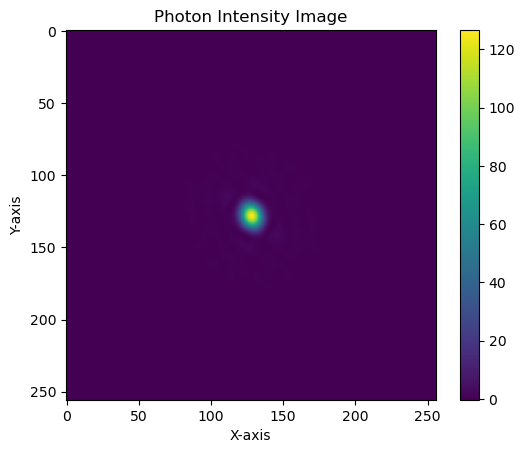

In [5]:
# CuPy
# 5 rounds, 5 rep, test sample
rs2 = np.load('COACS/patternrs3.npy')
vs2 = np.load('COACS/patternvs3.npy')
rim2 = np.fft.fftshift(rs2[0])
vim2 = np.fft.fftshift(vs2[0])
plt.imshow(rim2)  # 'gray' colormap for grayscale images
plt.imshow(vim2)
plt.colorbar()  # Optional: Add a colorbar to show intensity scale
plt.title("Photon Intensity Image")  # Optional: Add a title
plt.xlabel("X-axis")  # Optional: Add label for X-axis
plt.ylabel("Y-axis")  # Optional: Add label for Y-axis
plt.show()

In [6]:
def get_varray(idx):
    return np.fft.fftshift(vs2[idx])

sum(sum(get_varray(0) - get_varray(4)))

0.0

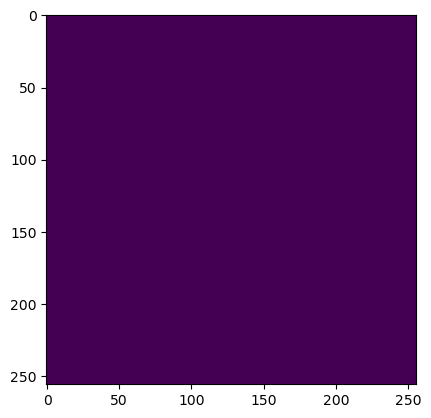

In [7]:
sum(sum(vim-vim2))

plt.imshow(-vim + vim2)
plt.show()

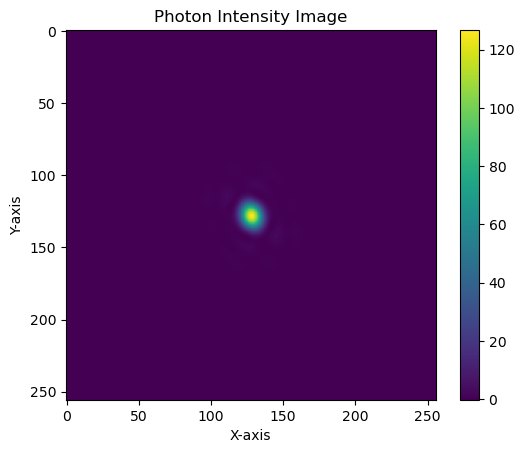

In [8]:
rfm = io.loadmat("COACS/rs2.mat")
vfm = io.loadmat('COACS/vs2.mat')

# transpose due to column-major matlab
rimm = np.fft.fftshift(rfm['rs'].T)
vimm = np.fft.fftshift(vfm['vs'].T)
# 5 rounds, 1 rep
plt.imshow(rimm)
plt.imshow(vimm)
plt.colorbar()  # Optional: Add a colorbar to show intensity scale
plt.title("Photon Intensity Image")  # Optional: Add a title
plt.xlabel("X-axis")  # Optional: Add label for X-axis
plt.ylabel("Y-axis")  # Optional: Add label for Y-axis
plt.show()

In [9]:

# todo: refactor into functions and perhaps class
# load complex reference matrix
f = h5py.File('reference.mat', 'r')
f2 = io.loadmat('COACS/pois2.mat')
vars = list(f.keys())
reference = f['reference'][:]
r3b = f['r3b'][:]
r_np = f['r'][:]

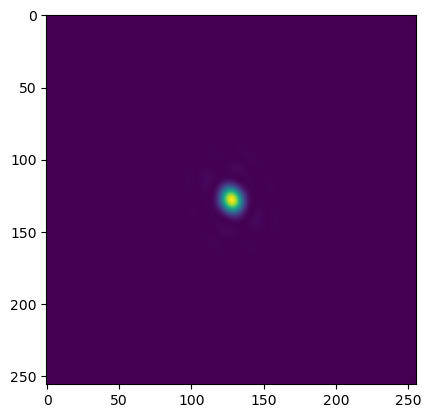

In [10]:
plt.imshow(np.fft.fftshift(r3b))

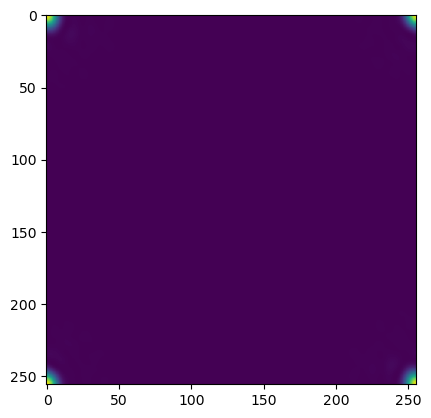

In [11]:
sum(sum((vim - vimm)))
plt.imshow(vim)
plt.imshow(vs2[0])

Axes(0.125,0.11;0.775x0.77)


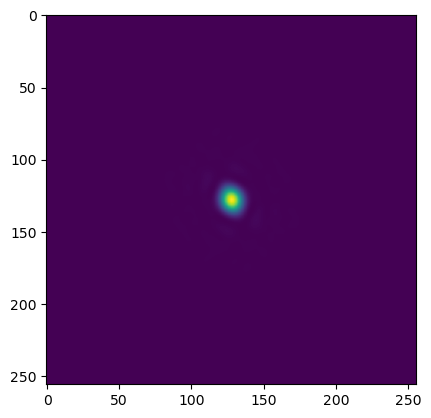

In [12]:
# CuPy
# 5 rounds, 5 rep
rs55 = np.load('img/patternrs55.npy')
vs55 = np.load('img/patternvs55.npy')
import time

def plot_imgs(arr):
    num_images = len(rs)
    
    # Calculate number of rows and columns for subplots
    num_rows = int(np.ceil(np.sqrt(num_images)))
    num_cols = int(np.ceil(num_images / num_rows))
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols)
    print(axes)
    
    # Loop through the images and display them
    for j in range(5):
        plt.imshow(np.fft.fftshift(arr[j]))  # 'gray' colormap for grayscale images
        time.sleep(2)
plot_imgs(vs55)

def sh(img):
    plt.imshow(np.fft.fftshift(img))

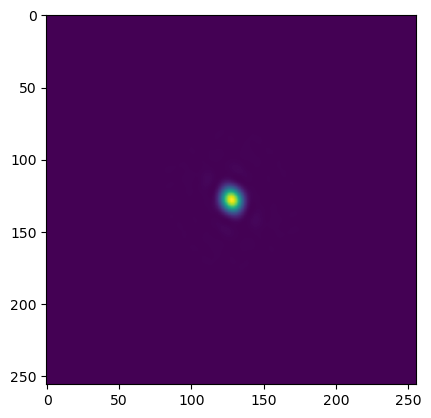

In [13]:
sh(vs55[2])

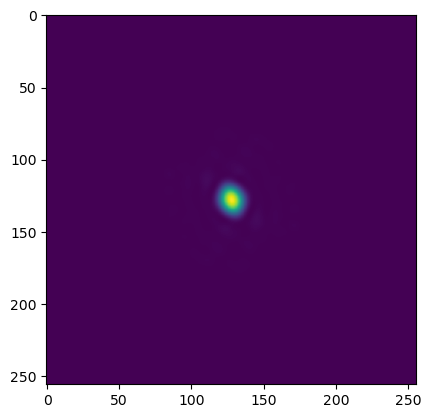

In [14]:
sh(vs55[3])

/tmp/ipykernel_7822/2134361581.py:1: RuntimeWarning: invalid value encountered in sqrt
  sh(vs55[4]**0.5)


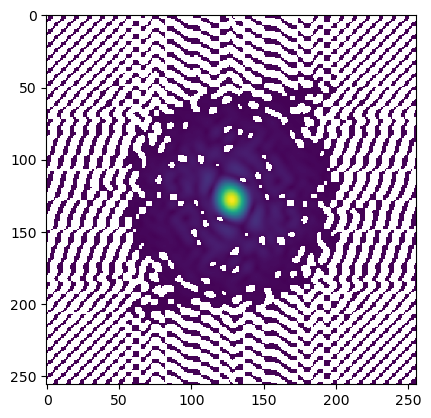

In [15]:
sh(vs55[4]**0.5)

In [16]:
for i in range(5):
    print(sum(sum(vs55[i])))

25027.240225854614
25162.070005576403
27437.307130073073
23529.31036842291
25341.5261765356


In [17]:
# square difference computations

def sq_sum(A):
    return np.sum(np.square(A))

def sq_diff(A, B):
    return np.sum((A - B) ** 2)

d = sq_diff(vs55[0], vs55[1])
s = sq_sum(vs55[0])
print(d / s)


0.0004016608477923691


0.00116847979479918
0.0031603579621845793
0.033637564088824505
0.03295037871874634
0.000630225084080808


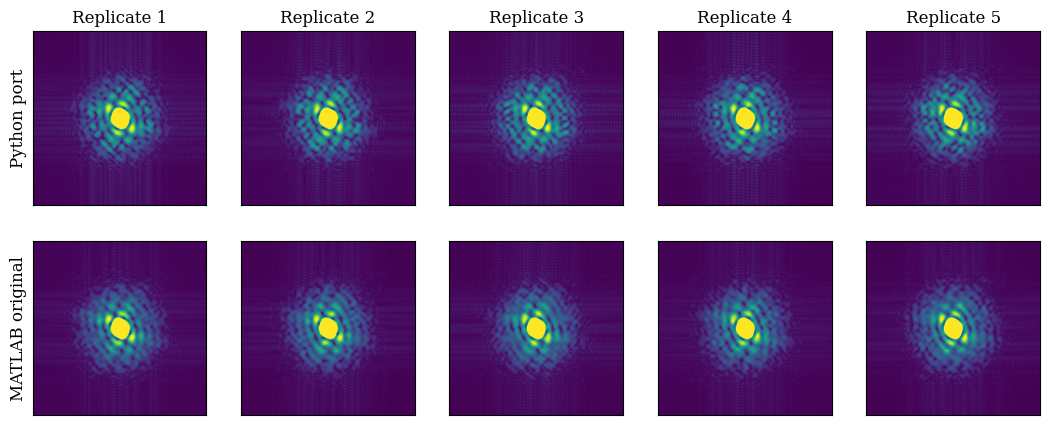

In [144]:
rm55 = io.loadmat("rs55.mat")['rs'][:].T
vm55 = io.loadmat("vs55.mat")['vs'][:].T


def index_mosaic(arr, idx):
    return np.fft.fftshift(arr[(idx-1)*256:idx*256, :256])

#plt.imshow(index_mosaic(vm55, 1))
#plt.imshow(np.fft.fftshift(vm55))
#plt.imshow(index_mosaic(rm55,5))
#plt.colorbar()

a1 = index_mosaic(vm55, 1)
a2 = index_mosaic(vm55, 2)
a3 = index_mosaic(vm55, 3)
a4 = index_mosaic(vm55, 4)
a5 = index_mosaic(vm55, 5)
vms = [a1, a2, a3, a4, a5]
sums = [sq_sum(a) for a in [a1, a2, a3, a4, a5]]

vshifted = [np.fft.fftshift(a) for a in vs55]

ffig, ax = plt.subplots(2, 5, figsize=(13,5))
#ffig.suptitle("Results of five-round, five replicate runs")

titles = ["Python port", "MATLAB original"]  # Titles for the two rows

# Add titles to the left of each row
for i, title in enumerate(titles):
    ax[i, 0].set_ylabel(title, fontsize=12, fontfamily='serif', ha='center', va='bottom', rotation=90)

for i in range(5):
        d = sq_diff(vms[i], vshifted[i])
        s = sq_sum(vms[i])
        #s = sq_sum(index_mosaic(rm55, i))
        print(d / s)
        ax[1, i].imshow(process(vms[i]), vmax=1.5)
        ax[0, i].set_title(f"Replicate {i+1}", fontfamily='serif')
        ax[0, i].imshow(process(vshifted[i]), vmax=1.5)
    
for p in ax:
    for a in p:
        a.get_xaxis().set_ticks([])
        a.get_yaxis().set_ticks([])
plt.savefig("comparisonhoriz.png", bbox_inches="tight", pad_inches=0)
plt.show()


0.00116847979479918
0.0031603579621845793
0.033637564088824505
0.03295037871874634
0.000630225084080808


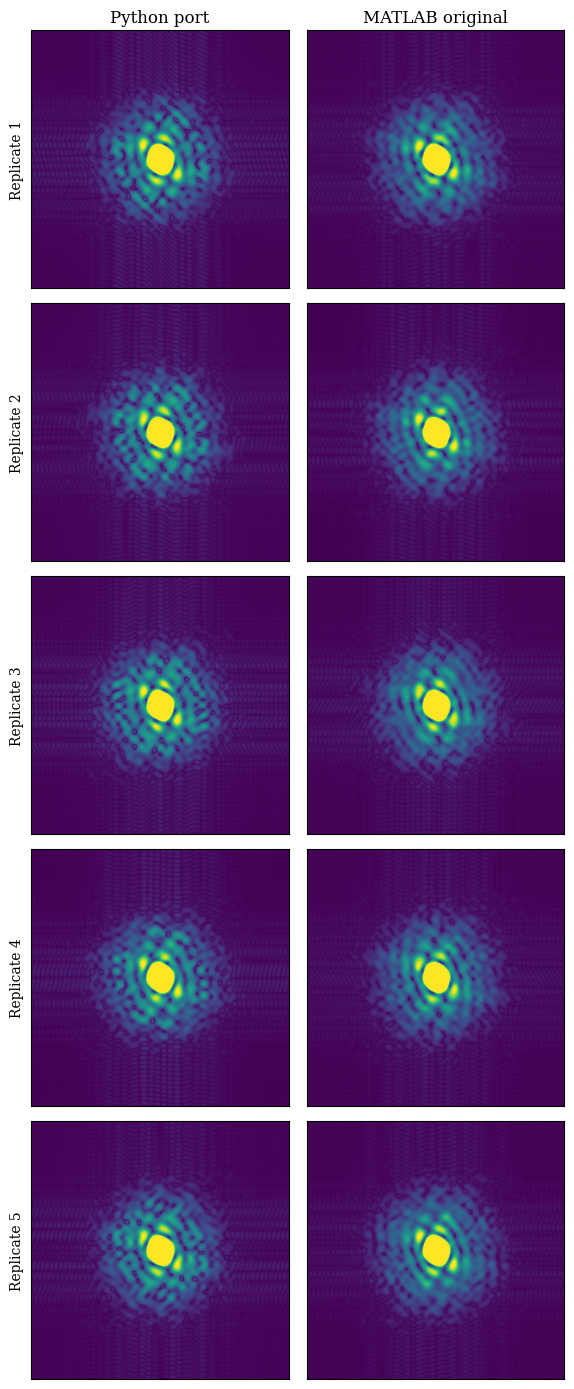

In [189]:
ffig, ax = plt.subplots(5, 2, figsize=[6, 14])
#ffig.suptitle("Results of five-round, five replicate runs")

titles = ["Python port", "MATLAB original"]  # Titles for the two rows

# Add titles to the left of each row
for i, title in enumerate(titles):
    ax[0, i].set_title(title, fontsize=12, fontfamily='serif', ha='center')

for i in range(5):
        d = sq_diff(vms[i], vshifted[i])
        s = sq_sum(vms[i])
        #s = sq_sum(index_mosaic(rm55, i))
        print(d / s)
        ax[i, 1].imshow(process(vms[i]), vmax=1.5)
        ax[i, 0].set_ylabel(f"Replicate {i+1}", fontfamily='serif', rotation=90, ha="center", va="center", labelpad=10)
        ax[i, 0].imshow(process(vshifted[i]), vmax=1.5)
    
for p in ax:
    for a in p:
        a.get_xaxis().set_ticks([])
        a.get_yaxis().set_ticks([])

plt.tight_layout()
plt.savefig("comparisonvert.png", bbox_inches="tight", pad_inches=0)
plt.show()

SQ diff div by original matrix
0.008236668998470741
0.0022908301451782086
0.006641573276342366
0.0007616450585461491
0.00021071678139627622
0.01923157456924446
0.0052658673931062034
0.0028322623665357005
0.008122314936345696


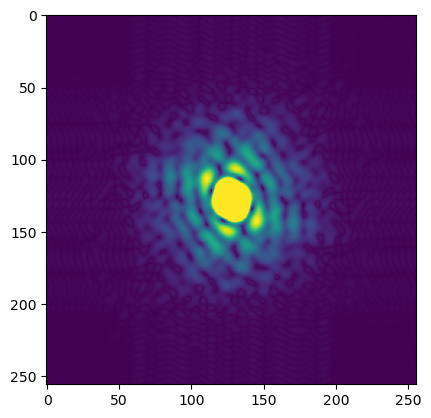

In [216]:
# 10 rounds
vs1010 = [np.fft.fftshift(np.load(f'img/pattern1010/vs/rep{i}.npy')) for i in range(1, 10)]
#rs1010 = [np.load(f'img/pattern1010/rs/rep{i}.npy') for i in range(1, 10)]
vm1010 = io.loadmat("img/vs1010.mat")['vs'].T
plt.savefig('rs9.png')/s
V = index_mosaic(vm1010, 8)#vs1010[8]


print("SQ diff div by original matrix")
for i in range(9):
    #print(i)
    d = sq_diff(vs1010[i], index_mosaic(vm1010, i+1))
    s = sq_sum(vs1010[i])
    #s = sq_sum(index_mosaic(rm55, i))
    print(d / s)
    #print(sum(sum(vs1010[i] - index_mosaic(vm1010, i+1))))
    #plt.imshow(vs1010[i] - index_mosaic(vm1010, i + 1))
    #plt.imshow(vs1010[i])
#plt.imshow(process(vs1010[8]), vmax=2)
#plt.imshow(process(index_mosaic(vm1010, 8)), vmax=2)


    
plt.imshow(process(V), vmax=1.5)  # V = utdata (vs) från en coacs-körning
#plt.colorbar()

#plt.savefig('vmax_processed.png')

In [ ]:
np.max(vm1010)
obvs = io.loadmat('oldbacktrackvs.mat')['vs'].T
plt.imshow(np.fft.fftshift(obvs))

In [ ]:
# square difference computations

def sq_sum(A):
    return np.sum(A ** 2)

def sq_diff(A, B):
    return np.sum((A - B) ** 2)

d = sq_diff(vs55[0], vs55[1])
s = sq_sum(vs55[0])
print(d / s)
